In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [6]:
df=pd.read_csv('../DATASET/Bitcoin History.csv')

In [7]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [8]:
print(df.head())


           Date     Price      Open      High       Low    Vol. Change %
0  Feb 09, 2024  47,545.4  45,293.3  47,710.2  45,254.2  86.85K    4.97%
1  Feb 08, 2024  45,293.3  44,346.2  45,579.2  44,336.4  66.38K    2.15%
2  Feb 07, 2024  44,339.8  43,088.4  44,367.9  42,783.5  48.57K    2.91%
3  Feb 06, 2024  43,087.7  42,697.6  43,375.5  42,566.8  33.32K    0.91%
4  Feb 05, 2024  42,697.2  42,581.4  43,532.2  42,272.5  39.26K    0.27%


In [9]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Handle Missing Values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values)

# Convert 'Vol.' column to numeric after removing commas and letters ('K')
def convert_volume(vol):
    if pd.isna(vol) or vol == '-':  # Check if the value is None or '-'
        return None  # Set missing values and '-' to None
    vol = str(vol).replace(',', '')  # Convert to string before replacing
    if vol.endswith('K'):
        return float(vol[:-1]) * 1000
    elif vol.endswith('M'):
        return float(vol[:-1]) * 1000000
    elif vol.endswith('B'):
        return float(vol[:-1]) * 1000000000
    else:
        return float(vol)

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Impute missing values with mean
mean_vol = df['Vol.'].mean()
df['Vol.'].fillna(mean_vol, inplace=True)
print("Imputed missing values with mean:", mean_vol)

# Check if there are any missing values after cleaning
missing_values_after = df.isnull().sum()
print("Columns with missing values after cleaning:")
print(missing_values_after)


Columns with missing values:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Imputed missing values with mean: 12486189.171549808
Columns with missing values after cleaning:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [10]:
print(df.head())

           Date     Price      Open      High       Low     Vol. Change %
0  Feb 09, 2024  47,545.4  45,293.3  47,710.2  45,254.2  86850.0    4.97%
1  Feb 08, 2024  45,293.3  44,346.2  45,579.2  44,336.4  66380.0    2.15%
2  Feb 07, 2024  44,339.8  43,088.4  44,367.9  42,783.5  48570.0    2.91%
3  Feb 06, 2024  43,087.7  42,697.6  43,375.5  42,566.8  33320.0    0.91%
4  Feb 05, 2024  42,697.2  42,581.4  43,532.2  42,272.5  39260.0    0.27%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

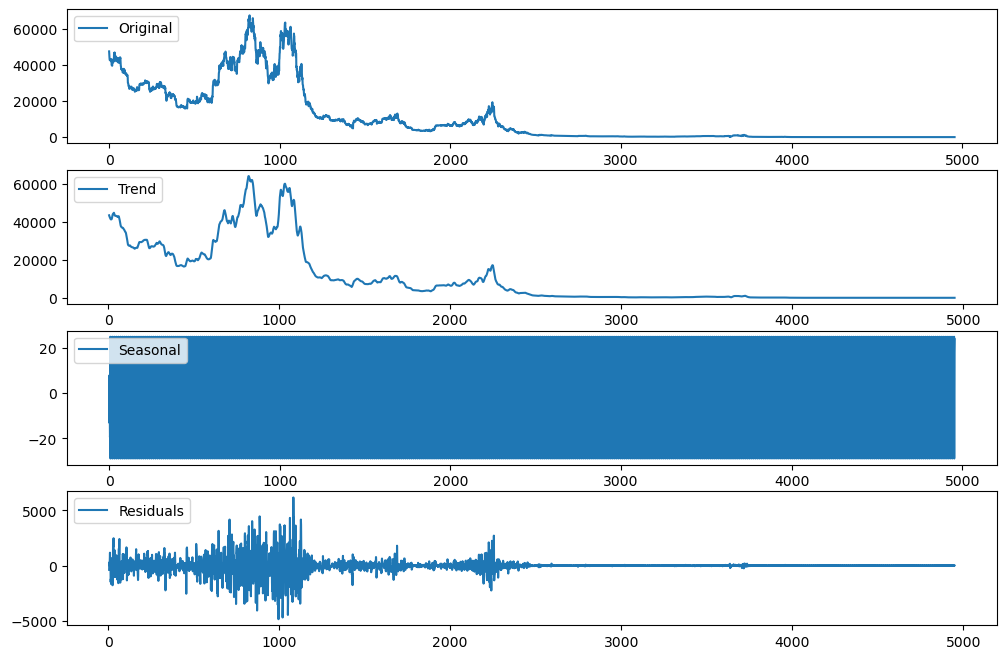

In [12]:
# Convert 'Price' column to numerical format
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Perform seasonal decomposition
result = seasonal_decompose(df['Price'], model='additive', period=12)  # Adjust 'period' based on your data's seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Price'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.show()


In [13]:
print(df.head())

           Date    Price      Open      High       Low     Vol. Change %
0  Feb 09, 2024  47545.4  45,293.3  47,710.2  45,254.2  86850.0    4.97%
1  Feb 08, 2024  45293.3  44,346.2  45,579.2  44,336.4  66380.0    2.15%
2  Feb 07, 2024  44339.8  43,088.4  44,367.9  42,783.5  48570.0    2.91%
3  Feb 06, 2024  43087.7  42,697.6  43,375.5  42,566.8  33320.0    0.91%
4  Feb 05, 2024  42697.2  42,581.4  43,532.2  42,272.5  39260.0    0.27%


In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
# Replace 'X' and 'y' with your actual feature and target variable names
X = df[['Open', 'High', 'Low', 'Vol.']]  # Example features, modify as needed
y = df['Price']  # Example target variable, modify as needed

# Split the data into train and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3964, 4)
y_train shape: (3964,)
X_test shape: (991, 4)
y_test shape: (991,)


In [15]:
print(df.head())

           Date    Price      Open      High       Low     Vol. Change %
0  Feb 09, 2024  47545.4  45,293.3  47,710.2  45,254.2  86850.0    4.97%
1  Feb 08, 2024  45293.3  44,346.2  45,579.2  44,336.4  66380.0    2.15%
2  Feb 07, 2024  44339.8  43,088.4  44,367.9  42,783.5  48570.0    2.91%
3  Feb 06, 2024  43087.7  42,697.6  43,375.5  42,566.8  33320.0    0.91%
4  Feb 05, 2024  42697.2  42,581.4  43,532.2  42,272.5  39260.0    0.27%


In [16]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Calculate daily price change (Price difference between consecutive days)
df['Price_Change'] = df['Price'].diff()

# Calculate percentage change in price
df['Price_Percentage_Change'] = df['Price'].pct_change() * 100

# Calculate the average price over a certain window (e.g., 7 days)
window_size = 7
df['Price_Moving_Average'] = df['Price'].rolling(window=window_size).mean()

# Calculate the price volatility over a certain window (e.g., 7 days)
df['Price_Volatility'] = df['Price'].rolling(window=window_size).std()

# Calculate the volume moving average
df['Volume_Moving_Average'] = df['Vol.'].rolling(window=window_size).mean()

# Calculate the volume volatility
df['Volume_Volatility'] = df['Vol.'].rolling(window=window_size).std()

# Drop rows with missing values after feature engineering
df.dropna(inplace=True)

# Display the updated DataFrame with engineered features
print(df.head())


         Date    Price      Open      High       Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43,194.7  43,370.4  42,882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43,083.7  43,459.3  42,596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42,580.1  43,263.1  41,890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42,946.2  43,739.7  42,315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43,303.3  43,817.9  42,702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average 

In [17]:
print(df.head())

         Date    Price      Open      High       Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43,194.7  43,370.4  42,882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43,083.7  43,459.3  42,596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42,580.1  43,263.1  41,890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42,946.2  43,739.7  42,315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43,303.3  43,817.9  42,702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average 

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'df' contains your DataFrame
# Replace 'df' with your actual DataFrame containing numerical features

# Convert numeric columns to string and then remove commas
numeric_cols = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')

# Convert the columns back to numeric type
df[numeric_cols] = df[numeric_cols].astype(float)

# Extract numerical features
X = df[['Open', 'High', 'Low', 'Vol.']]

# Normalization (MinMaxScaler)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Standardization (StandardScaler)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Print the first few rows of normalized and standardized data
print("Normalized Data:")
print(X_normalized[:5])
print("\nStandardized Data:")
print(X_standardized[:5])

Normalized Data:
[[6.39649512e-01 6.28641625e-01 6.46447044e-01 3.24161080e-06]
 [6.38005766e-01 6.29930208e-01 6.42140110e-01 9.52349010e-06]
 [6.30548197e-01 6.27086338e-01 6.31500161e-01 1.06510069e-05]
 [6.35969595e-01 6.33994535e-01 6.37905537e-01 1.26174499e-05]
 [6.41257717e-01 6.35128025e-01 6.43747107e-01 1.23154365e-05]]

Standardized Data:
[[ 2.16364049  2.10644803  2.22195712 -0.08022344]
 [ 2.15633459  2.11215843  2.20262476 -0.08004304]
 [ 2.1231882   2.09955572  2.15486565 -0.08001066]
 [ 2.1472845   2.13016964  2.18361721 -0.07995418]
 [ 2.17078842  2.13519274  2.20983803 -0.07996286]]


In [19]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'Month', 'Day', 'Price_Change', 'Price_Percentage_Change',
       'Price_Moving_Average', 'Price_Volatility', 'Volume_Moving_Average',
       'Volume_Volatility'],
      dtype='object')

In [20]:
print(df.head())

         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' contains your Bitcoin price data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Volume', etc.

# Example features
X = df[['Open', 'High', 'Low', 'Vol.']]  

# Example target variable
y = df['Price']  

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 76444.5633305578
Root Mean Squared Error: 276.48609970585824
R^2 Score: 0.9996965597912151


In [22]:
print(df.head())

         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' contains your Bitcoin price data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Volume', etc.

# Example features
X = df[['Open', 'High', 'Low', 'Vol.']]  

# Example target variable
y = df['Price']  

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Taking the square root of mean squared error to get RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 165521.36249737864
Root Mean Squared Error: 406.8431669542683
R^2 Score: 0.9993429769939638


In [24]:
print(df.head())

         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'df' contains your Bitcoin price data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Volume', etc.

# Example features
X = df[['Open', 'High', 'Low', 'Vol.']]

# Example target variable
y = df['Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()

# Fit the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 177677.23158281957
Root Mean Squared Error: 421.5177713724767
R^2 Score: 0.9992947253029011


In [26]:
print(df.head())


         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your Bitcoin price dataset into DataFrame 'df'
# df = pd.read_csv('your_dataset.csv')

# Data preprocessing
# Handle missing values, convert data types, etc.

# Splitting data into features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape input to be [samples, time steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Fit the model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=50, verbose=0)

# Make predictions
y_pred = lstm_model.predict(X_test_lstm)

# Inverse scaling for predictions using the correct scaler
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled)

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("LSTM Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")



31/31 [==============================] - 0s 2ms/step
LSTM Model Performance:
Mean Squared Error: 191858.85501653474
Root Mean Squared Error: 438.01695745317295
R^2 Score: 0.9992384325518125


In [28]:
print(df.head())

         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your Bitcoin price dataset into DataFrame 'df'
# df = pd.read_csv('your_dataset.csv')

# Data preprocessing
# Handle missing values, convert data types, etc.

# Splitting data into features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape input to be [samples, time steps, features]
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model using scaled y_train
model.fit(X_train_gru, y_train_scaled, epochs=50, verbose=0)

# Predictions
y_pred = model.predict(X_test_gru)

# Inverse scaling for predictions using the correct scaler
y_pred = scaler_y.inverse_transform(y_pred)  # Note the use of scaler_y here
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled)  # Also ensure to inverse scale the actual test values correctly

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred)

print("GRU:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


31/31 [==============================] - 0s 2ms/step
GRU:
Mean Squared Error: 140171.27969821566
Root Mean Squared Error: 374.39455083937276
R^2 Score: 0.9994436019970007


In [30]:
print(df.head())

         Date    Price     Open     High      Low     Vol. Change %  Year  \
6  2024-02-03  43005.7  43194.7  43370.4  42882.0  14570.0   -0.44%  2024   
7  2024-02-02  43194.7  43083.7  43459.3  42596.3  42650.0    0.26%  2024   
8  2024-02-01  43081.4  42580.1  43263.1  41890.5  47690.0    1.18%  2024   
9  2024-01-31  42580.5  42946.2  43739.7  42315.4  56480.0   -0.85%  2024   
10 2024-01-30  42946.2  43303.3  43817.9  42702.9  55130.0   -0.82%  2024   

    Month  Day  Price_Change  Price_Percentage_Change  Price_Moving_Average  \
6       2    3         424.3                 0.996444          44078.642857   
7       2    2         189.0                 0.439477          43457.114286   
8       2    1        -113.3                -0.262301          43141.128571   
9       1   31        -500.9                -1.162683          42889.800000   
10      1   30         365.7                 0.858844          42869.585714   

    Price_Volatility  Volume_Moving_Average  Volume_Volatility

In [31]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Load your Bitcoin price dataset into DataFrame 'df'
# # Ensure to replace 'your_dataset.csv' with the path to your actual dataset
# df = pd.read_csv('DATASET/Bitcoin History.csv')
# # Data preprocessing
# # Ensure the DataFrame is sorted by date if it's not already
# # Ensure the DataFrame is sorted by date
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date').asfreq('D')

# # Data preprocessing
# # Convert the 'Price' column to numeric type, ensuring no non-numeric data persists
# df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# # Fill any remaining missing values after conversion
# # Previously .fillna(method='ffill') is deprecated, use .ffill() instead
# df['Price'] = df['Price'].ffill()  # Forward fill to handle missing values

# # Splitting data into the target variable
# y = df['Price']

# # Train-test split (assuming chronological split)
# train_size = int(len(y) * 0.8)
# train_data, test_data = y.iloc[:train_size], y.iloc[train_size:]

# # ARIMA model configuration
# order = (5, 1, 0)  # Adjust ARIMA configuration based on your dataset
# arima_model = ARIMA(train_data, order=order)
# arima_model_fit = arima_model.fit()

# # Make predictions
# y_pred_arima = arima_model_fit.forecast(steps=len(test_data))

# # Evaluation
# mse = mean_squared_error(test_data, y_pred_arima)
# rmse = mse ** 0.5
# r2 = r2_score(test_data, y_pred_arima)

# print("ARIMA Model Performance:")
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R^2 Score: {r2}")

# # Plotting predictions vs actual values
# plt.figure(figsize=(12, 6))
# plt.plot(test_data.index, test_data.values, label='Actual Prices', color='blue', marker='o')
# plt.plot(test_data.index, y_pred_arima, label='Predicted Prices', color='red', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Bitcoin Price')
# plt.title('ARIMA Predictions vs Actual Prices')
# plt.legend()
# plt.show()


In [32]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Define a function to convert 'K' and 'M' suffixed strings to floats
# def convert_volume(value):
#     if pd.isnull(value):
#         return np.nan
#     if isinstance(value, str):
#         if value.endswith('M'):
#             return float(value.strip('M')) * 1e6
#         elif value.endswith('K'):
#             return float(value.strip('K')) * 1e3
#     return float(value)

# # Load the dataset
# df = pd.read_csv('DATASET/Bitcoin History.csv', parse_dates=['Date'])
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True)

# # Convert financial columns from strings to numeric values
# df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')
# df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''), errors='coerce')
# df['High'] = pd.to_numeric(df['High'].str.replace(',', ''), errors='coerce')
# df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''), errors='coerce')
# df['Vol.'] = df['Vol.'].apply(convert_volume)
# df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%', ''), errors='coerce')

# # Handle missing values
# df.fillna(method='ffill', inplace=True)  # Forward fill for time series data

# # Verify the data
# print("Data after preprocessing:")
# print(df.head())

# # Splitting data into the target variable
# y = df['Price']
# train_size = int(len(y) * 0.8)
# train_data, test_data = y.iloc[:train_size], y.iloc[train_size:]

# # ARIMA model configuration and fitting
# order = (5, 1, 0)  # These are example parameters; adjust based on your dataset
# arima_model = ARIMA(train_data, order=order)
# arima_model_fit = arima_model.fit()

# # Make predictions
# y_pred_arima = arima_model_fit.forecast(steps=len(test_data))

# # Evaluation
# mse = mean_squared_error(test_data, y_pred_arima)
# rmse = np.sqrt(mse)
# r2 = r2_score(test_data, y_pred_arima)

# print("ARIMA Model Performance:")
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R^2 Score: {r2}")

# # Plotting predictions vs actual values
# plt.figure(figsize=(12, 6))
# plt.plot(test_data.index, test_data.values, label='Actual Prices', color='blue', marker='o')
# plt.plot(test_data.index, y_pred_arima, label='Predicted Prices', color='red', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Bitcoin Price')
# plt.title('ARIMA Predictions vs Actual Prices')
# plt.legend()
# plt.show()


In [33]:
# import pandas as pd
# import numpy as np

# # Function to convert 'K' and 'M' suffixed strings to float
# def convert_to_numeric(value):
#     if isinstance(value, str):  # Check if the value is a string
#         if value.endswith('M'):
#             return float(value.replace('M', '').replace(',', '')) * 1e6  # Convert to millions
#         elif value.endswith('K'):
#             return float(value.replace('K', '').replace(',', '')) * 1e3  # Convert to thousands
#         else:
#             return pd.to_numeric(value.replace(',', ''), errors='coerce')  # Convert other strings and remove commas
#     return value  # Return as-is if not a string

# # Load the dataset
# df = pd.read_csv('DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# # Ensure the DataFrame is sorted by date
# df.sort_index(inplace=True)

# # Apply the conversion function to all necessary columns
# columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
# for col in columns_to_convert:
#     df[col] = df[col].apply(convert_to_numeric)

# # Handle missing 'Price' values
# df['Price'] = df['Price'].fillna(method='ffill')  # Forward fill to handle missing values

# # Check the first few rows to ensure the data looks correct
# print(df)


In [35]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# Ensure the DataFrame is sorted by date
df.sort_index(inplace=True)

# Convert 'K' and 'M' suffixed strings to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan  # Return NaN for missing values
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace(',', '')  # Remove commas from numbers
        if value.endswith('M'):
            return float(value.strip('M')) * 1e6  # Convert to millions
        elif value.endswith('K'):
            return float(value.strip('K')) * 1e3  # Convert to thousands
        else:
            return pd.to_numeric(value, errors='coerce')  # Convert other strings
    return value  # Return as-is if not a string

# Apply the conversion function to all necessary columns
columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Forward fill to handle missing values only after ensuring it's the right approach for your dataset
# You might not want to do this if your dataset should not interpolate values between days
df = df.ffill()

# Check the first few rows to ensure the data looks correct
print(df)


              Price     Open     High      Low     Vol. Change %
Date                                                            
2010-07-18      0.1      0.0      0.1      0.1     80.0    0.00%
2010-07-19      0.1      0.1      0.1      0.1    570.0    0.00%
2010-07-20      0.1      0.1      0.1      0.1    260.0    0.00%
2010-07-21      0.1      0.1      0.1      0.1    580.0    0.00%
2010-07-22      0.1      0.1      0.1      0.1   2160.0    0.00%
...             ...      ...      ...      ...      ...      ...
2024-02-05  42697.2  42581.4  43532.2  42272.5  39260.0    0.27%
2024-02-06  43087.7  42697.6  43375.5  42566.8  33320.0    0.91%
2024-02-07  44339.8  43088.4  44367.9  42783.5  48570.0    2.91%
2024-02-08  45293.3  44346.2  45579.2  44336.4  66380.0    2.15%
2024-02-09  47545.4  45293.3  47710.2  45254.2  86850.0    4.97%

[4955 rows x 6 columns]


In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Price' is the column you're interested in modeling
# And assuming 'df' has already been preprocessed as per our previous steps

# Selecting the 'Price' series for modeling
y = df['Price']

# Assuming daily frequency is correct for your dataset
train_data.index = pd.DatetimeIndex(train_data.index.values, freq=train_data.index.inferred_freq)
test_data.index = pd.DatetimeIndex(test_data.index.values, freq=test_data.index.inferred_freq)

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Generate forecasts
y_pred_arima = arima_model_fit.forecast(steps=len(test_data))

# Evaluation and plotting code remains the same


# Evaluation
mse = mean_squared_error(test_data, y_pred_arima)
rmse = mse ** 0.5
residuals = test_data - y_pred_arima
r2 = r2_score(test_data, y_pred_arima)

print("ARIMA Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred_arima, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Predictions vs Actual Prices')
plt.legend()
plt.show()


NameError: name 'train_data' is not defined

C:\Users\sugip\AppData\Local\Temp\ipykernel_20376\1326422576.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\sugip\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sugip\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sugip\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Performance:
Mean Squared Error: 162887120.70616987
Root Mean Squared Error: 12762.723874869733
R^2 Score: -0.21587047303723295


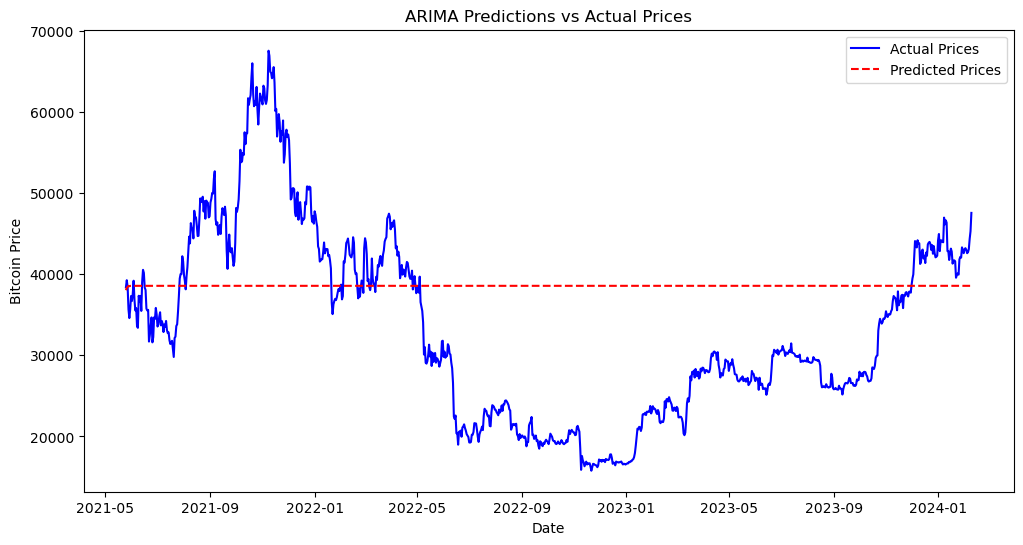

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# Ensure the DataFrame is sorted by date
df.sort_index(inplace=True)

# Convert 'K' and 'M' suffixed strings to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan  # Return NaN for missing values
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace(',', '')  # Remove commas from numbers
        if value.endswith('M'):
            return float(value.strip('M')) * 1e6  # Convert to millions
        elif value.endswith('K'):
            return float(value.strip('K')) * 1e3  # Convert to thousands
        else:
            return pd.to_numeric(value, errors='coerce')  # Convert other strings
    return value  # Return as-is if not a string

# Apply the conversion function to all necessary columns
columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Forward fill to handle missing values only after ensuring it's the right approach for your dataset
# You might not want to do this if your dataset should not interpolate values between days
df = df.fillna(method='ffill')

# Selecting the 'Price' series for modeling
y = df['Price']

# Train-test split (assuming chronological split, modify the ratio as needed)
train_size = int(len(y) * 0.8)
train_data, test_data = y.iloc[:train_size], y.iloc[train_size:]

# ARIMA model configuration and fitting
# The order (p, d, q) should be chosen based on your specific dataset
# For this example, I'm using (5,1,0), but you should perform model selection based on ACF and PACF plots or other criteria
order = (5, 1, 0)
arima_model = ARIMA(train_data, order=order)
arima_model_fit = arima_model.fit()

# Make predictions
y_pred_arima = arima_model_fit.forecast(steps=len(test_data))

# Evaluation
mse = mean_squared_error(test_data, y_pred_arima)
rmse = mse ** 0.5
r2 = r2_score(test_data, y_pred_arima)

print("ARIMA Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred_arima, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Predictions vs Actual Prices')
plt.legend()
plt.show()


In [39]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00%
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00%
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00%
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00%
...,...,...,...,...,...,...
2024-02-05,42697.2,42581.4,43532.2,42272.5,39260.0,0.27%
2024-02-06,43087.7,42697.6,43375.5,42566.8,33320.0,0.91%
2024-02-07,44339.8,43088.4,44367.9,42783.5,48570.0,2.91%


In [40]:
from pmdarima import auto_arima

In [41]:
train_data = df['Price']  # Assuming 'Price' is the target variable

# Training the auto ARIMA model
autoARIMA_model = auto_arima(train_data, start_p=1, start_q=1, test='kpss', max_p=3, max_q=3, m=1, seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(autoARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78362.368, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78364.179, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78360.416, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78360.499, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78363.232, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=78362.265, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78362.761, Time=1.41 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=78359.539, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=78361.377, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=78361.483, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=78359.621, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=78358.755, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=78358.093, Time=0.76 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=78360.309, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0

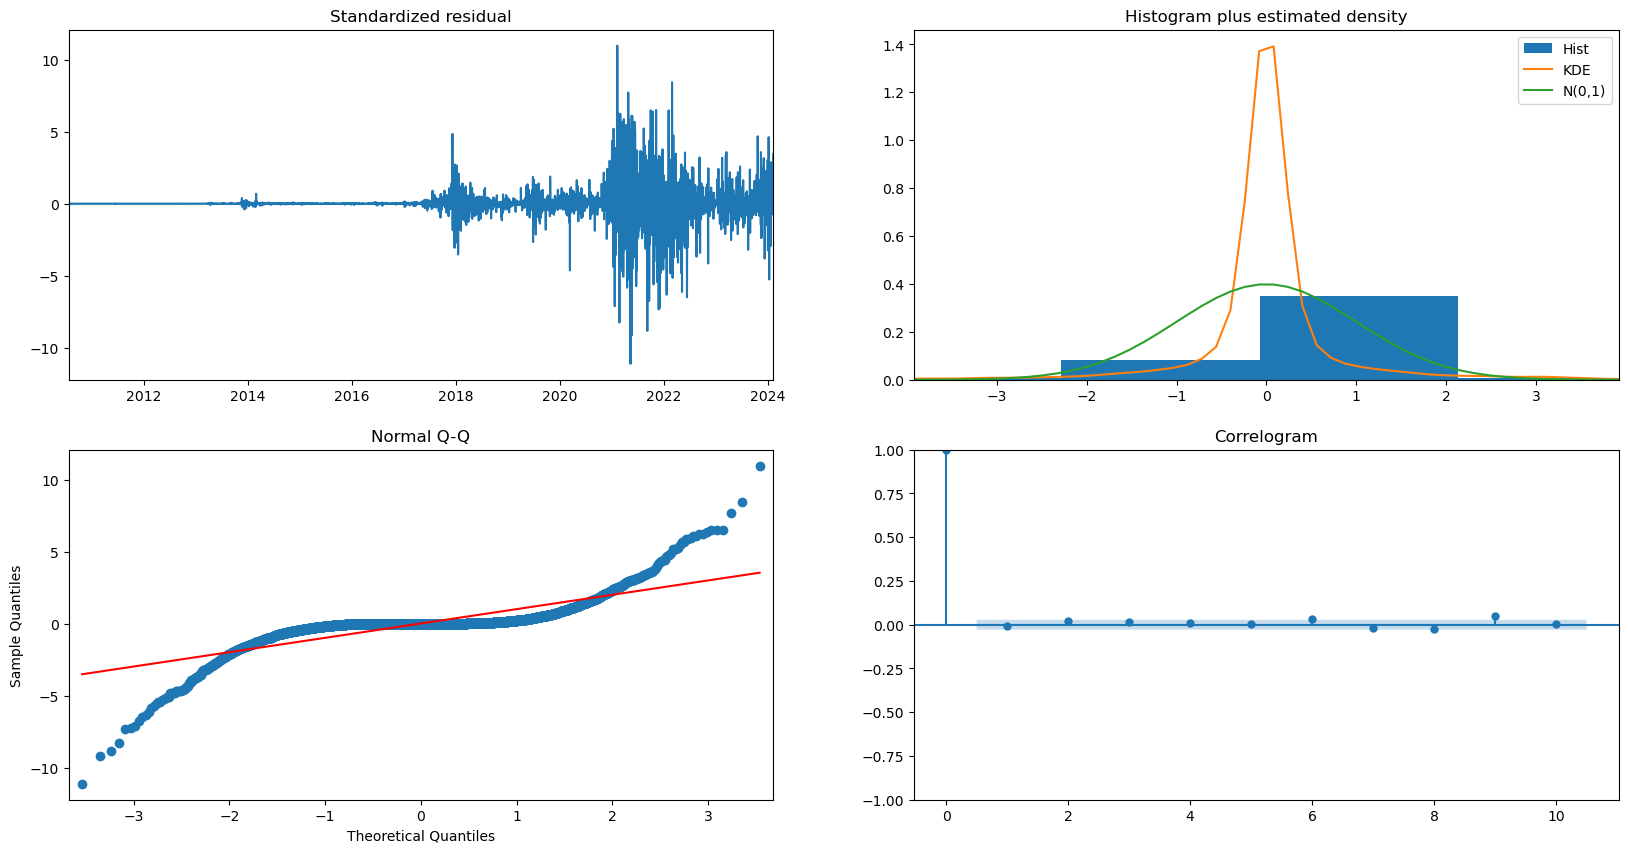

In [42]:
autoARIMA_model.plot_diagnostics(figsize=(20,10))
plt.show()

In [43]:
train=df[:3964]

In [44]:
train

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00%
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00%
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00%
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00%
...,...,...,...,...,...,...
2021-05-20,40717.2,36706.8,42425.9,35010.4,269750.0,10.88%
2021-05-21,37297.4,40611.2,42108.3,33592.3,315500.0,-8.40%
2021-05-22,37448.3,37291.0,38776.0,35314.9,185830.0,0.40%


In [45]:
test=df[3964:]

In [46]:
test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-05-25,38378.3,38753.6,39740.8,36540.7,163010.0,-0.96%
2021-05-26,39249.2,38375.7,40750.0,37847.0,153800.0,2.27%
2021-05-27,38417.3,39249.0,40322.2,37190.8,122930.0,-2.12%
2021-05-28,35662.5,38543.2,38844.1,34772.4,199580.0,-7.17%
2021-05-29,34584.6,35664.5,37227.1,33664.2,160430.0,-3.02%
...,...,...,...,...,...,...
2024-02-05,42697.2,42581.4,43532.2,42272.5,39260.0,0.27%
2024-02-06,43087.7,42697.6,43375.5,42566.8,33320.0,0.91%
2024-02-07,44339.8,43088.4,44367.9,42783.5,48570.0,2.91%


In [47]:
train_data = train['Price']
test_data = test['Price']


In [48]:
autoARIMA_model = auto_arima(train_data, start_p=1, start_q=1, test='kpss', max_p=3, max_q=3, m=1 , seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(autoARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=60156.714, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60188.878, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60169.749, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=60173.340, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60188.521, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=60117.705, Time=1.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60135.462, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=60119.089, Time=0.87 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=60118.327, Time=2.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=60116.332, Time=1.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=60130.855, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=60119.384, Time=1.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=60122.736, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=60119.774, Time=1.82 sec
 ARIMA(1,1,2)(0,0,0

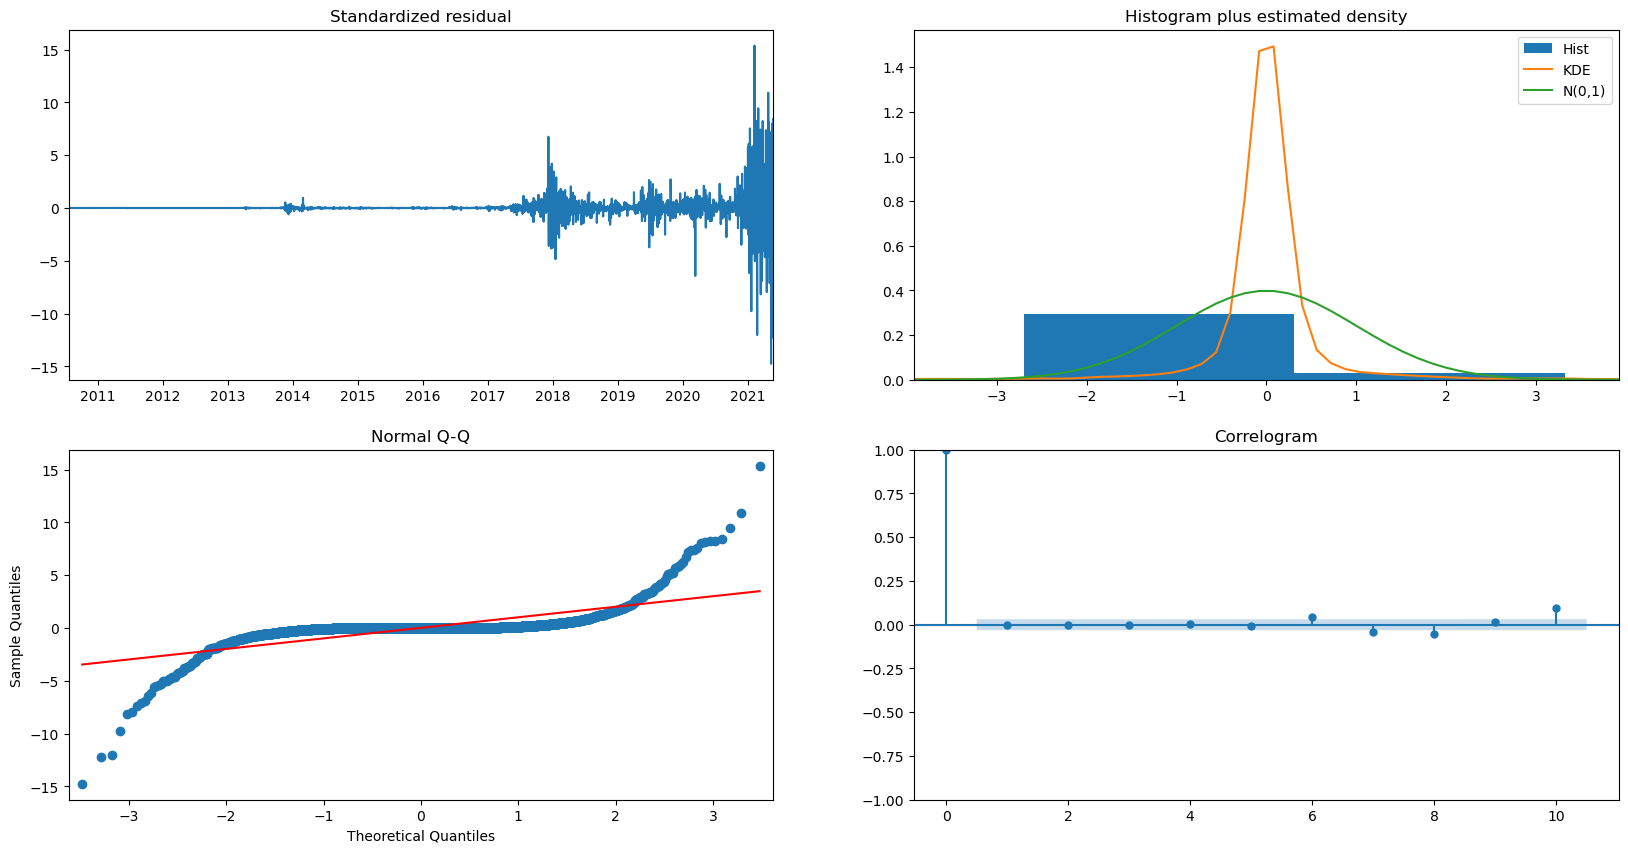

In [49]:
autoARIMA_model.plot_diagnostics(figsize=(20,10))
plt.show()

In [50]:
autoARIMA_model.fit(train_data)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [51]:
forecast = autoARIMA_model.predict(n_periods=991)

In [52]:
forecast_data=pd.DataFrame(forecast,index=test_data.index,columns=['Prediction'])

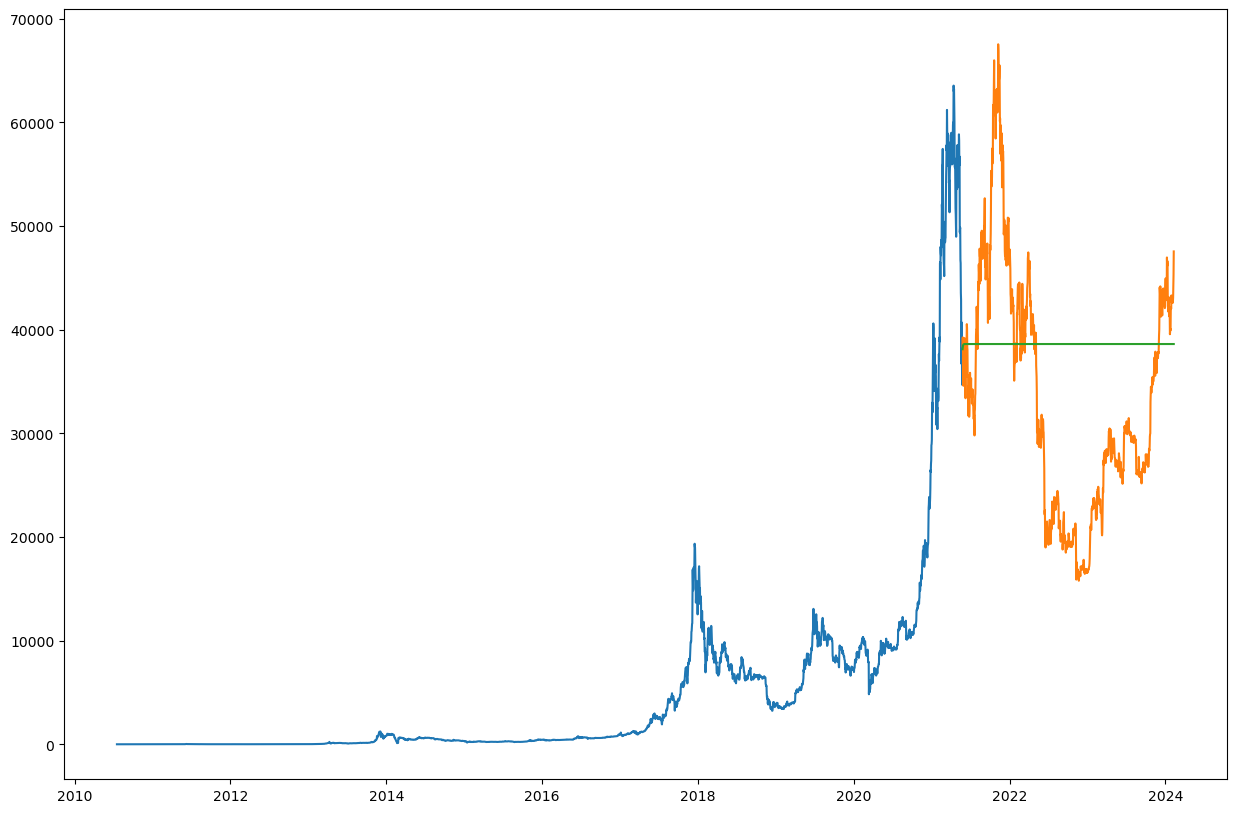

In [53]:
plt.figure(figsize=(15,10))

plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_data['Prediction'])
plt.show()

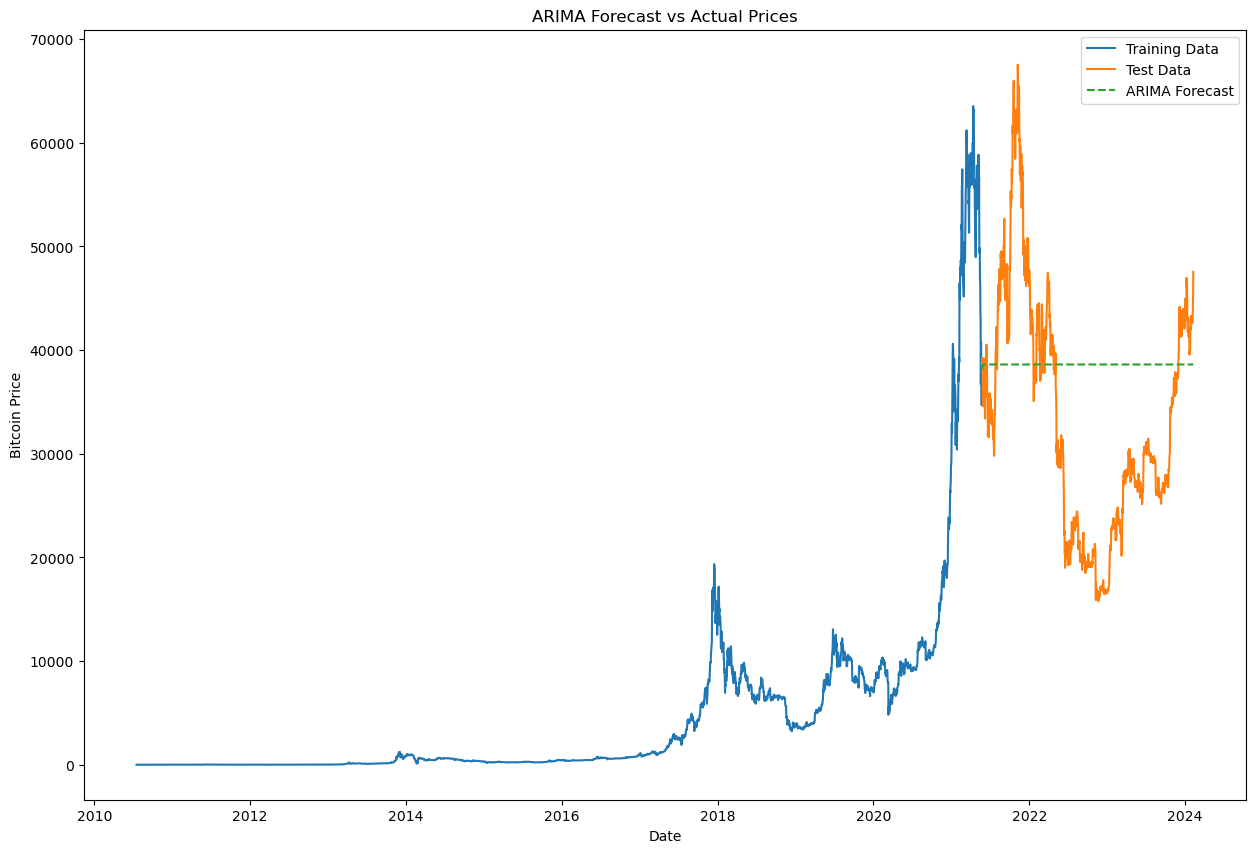

In [54]:
forecast = autoARIMA_model.predict(n_periods=len(test_data))

forecast_data = pd.DataFrame(forecast, index=test_data.index, columns=['Prediction'])

plt.figure(figsize=(15, 10))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_data, label='ARIMA Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Forecast vs Actual Prices')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
r2 = r2_score(test_data, forecast)

print('Mean Squared Error      : ', mse)
print('Root Mean Squared Error : ', rmse)
print('Mean Absolute Error     : ', mae)
print('R2 Score                : ', r2)


Mean Squared Error      :  163459896.6629913
Root Mean Squared Error :  12785.143591801825
Mean Absolute Error     :  10882.621888604692
R2 Score                :  -0.22014595762156097


C:\Users\sugip\AppData\Local\Temp\ipykernel_20376\799555362.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=60156.714, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60188.878, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60169.749, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=60173.340, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60188.521, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=60117.705, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60135.462, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=60119.089, Time=0.89 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=60118.327, Time=2.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=60116.332, Time=1.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=60130.855, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=60119.384, Time=1.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=60122.736, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=60119.774, Time=1.92 sec
 ARIMA(1,1,2)(0,0,0

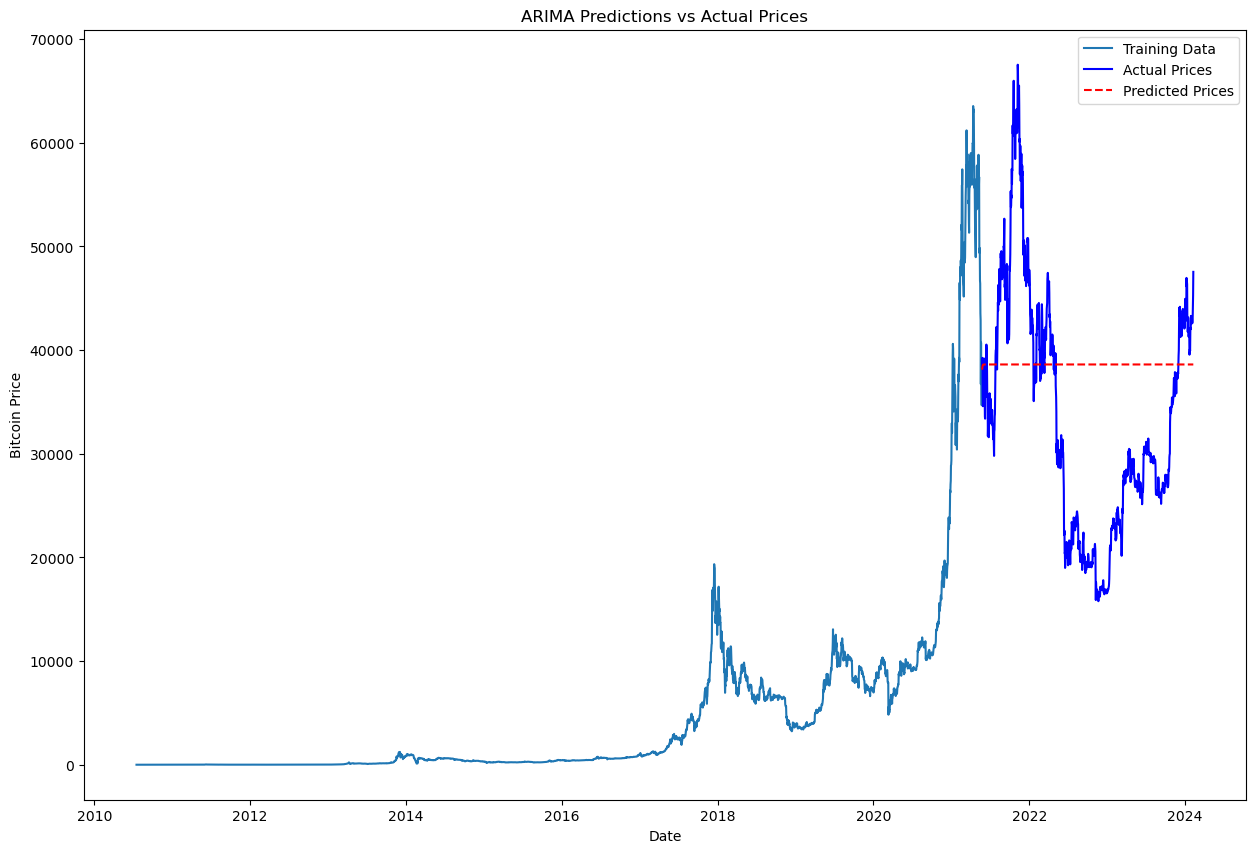

In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# Ensure the DataFrame is sorted by date
df.sort_index(inplace=True)

# Preprocessing
# Convert 'K' and 'M' suffixed strings to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan  # Return NaN for missing values
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace(',', '')  # Remove commas from numbers
        if value.endswith('M'):
            return float(value.strip('M')) * 1e6  # Convert to millions
        elif value.endswith('K'):
            return float(value.strip('K')) * 1e3  # Convert to thousands
        else:
            return pd.to_numeric(value, errors='coerce')  # Convert other strings
    return value  # Return as-is if not a string

# Apply the conversion function to all necessary columns
columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Handle missing values
df = df.fillna(method='ffill')  # Forward fill to handle missing values

# Splitting into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size]['Price'], df.iloc[train_size:]['Price']

# ARIMA model configuration and fitting using auto_arima for parameter selection
autoARIMA_model = auto_arima(train_data, start_p=1, start_q=1, test='kpss', max_p=3, max_q=3, m=1, seasonal=False,
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print(autoARIMA_model.summary())

# Forecasting
forecast = autoARIMA_model.predict(n_periods=len(test_data))

# Model evaluation
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
r2 = r2_score(test_data, forecast)

print('Mean Squared Error      : ', mse)
print('Root Mean_Squared_Error : ', rmse)
print('Mean Absolute Error     : ', mae)
print('R2 Score                : ', r2)

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Predictions vs Actual Prices')
plt.legend()
plt.show()


C:\Users\sugip\AppData\Local\Temp\ipykernel_20376\3593288282.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values


Epoch 1/50
62/62 [==============================] - 3s 21ms/step - loss: 0.0031
Epoch 2/50
62/62 [==============================] - 1s 21ms/step - loss: 3.0181e-04
Epoch 3/50
62/62 [==============================] - 1s 23ms/step - loss: 2.7947e-04
Epoch 4/50
62/62 [==============================] - 1s 22ms/step - loss: 2.3772e-04
Epoch 5/50
62/62 [==============================] - 1s 22ms/step - loss: 1.9189e-04
Epoch 6/50
62/62 [==============================] - 1s 22ms/step - loss: 2.0171e-04
Epoch 7/50
62/62 [==============================] - 1s 22ms/step - loss: 1.7522e-04
Epoch 8/50
62/62 [==============================] - 1s 22ms/step - loss: 1.5339e-04
Epoch 9/50
62/62 [==============================] - 1s 21ms/step - loss: 1.6579e-04
Epoch 10/50
62/62 [==============================] - 1s 21ms/step - loss: 1.3343e-04
Epoch 11/50
62/62 [==============================] - 1s 21ms/step - loss: 1.2753e-04
Epoch 12/50
62/62 [==============================] - 1s 21ms/step - loss: 1.22

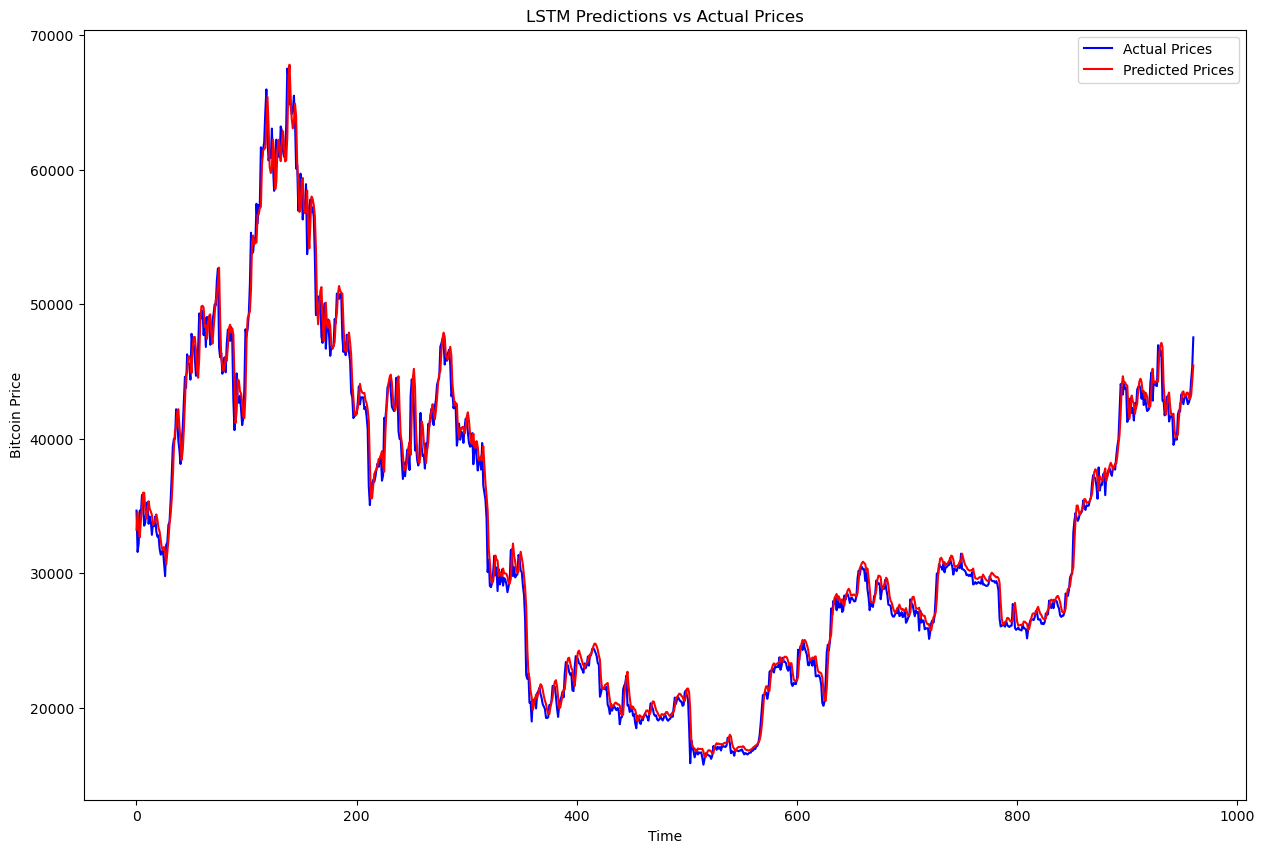

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# Ensure the DataFrame is sorted by date
df.sort_index(inplace=True)

# Preprocessing
# Convert 'K' and 'M' suffixed strings to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan  # Return NaN for missing values
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace(',', '')  # Remove commas from numbers
        if value.endswith('M'):
            return float(value.strip('M')) * 1e6  # Convert to millions
        elif value.endswith('K'):
            return float(value.strip('K')) * 1e3  # Convert to thousands
        else:
            return pd.to_numeric(value, errors='coerce')  # Convert other strings
    return value  # Return as-is if not a string

# Apply the conversion function to all necessary columns
columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Handle missing values
df = df.fillna(method='ffill')  # Forward fill to handle missing values

# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Splitting into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences and labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Adjust this parameter based on the sequence length you want to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Make predictions
predictions = model.predict(X_test)

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(scaler.inverse_transform(predictions), label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()


Epoch 1/50
50/50 [==============================] - 9s 106ms/step - loss: 0.0010 - val_loss: 0.0062
Epoch 2/50
50/50 [==============================] - 4s 77ms/step - loss: 2.7942e-04 - val_loss: 0.0042
Epoch 3/50
50/50 [==============================] - 4s 77ms/step - loss: 2.4153e-04 - val_loss: 0.0034
Epoch 4/50
50/50 [==============================] - 4s 77ms/step - loss: 2.2773e-04 - val_loss: 0.0042
Epoch 5/50
50/50 [==============================] - 4s 76ms/step - loss: 2.0445e-04 - val_loss: 0.0030
Epoch 6/50
50/50 [==============================] - 4s 75ms/step - loss: 1.9527e-04 - val_loss: 0.0028
Epoch 7/50
50/50 [==============================] - 4s 76ms/step - loss: 1.7590e-04 - val_loss: 0.0020
Epoch 8/50
50/50 [==============================] - 4s 75ms/step - loss: 1.7094e-04 - val_loss: 0.0024
Epoch 9/50
50/50 [==============================] - 4s 75ms/step - loss: 1.6976e-04 - val_loss: 0.0022
Epoch 10/50
50/50 [==============================] - 4s 78ms/step - loss: 1.

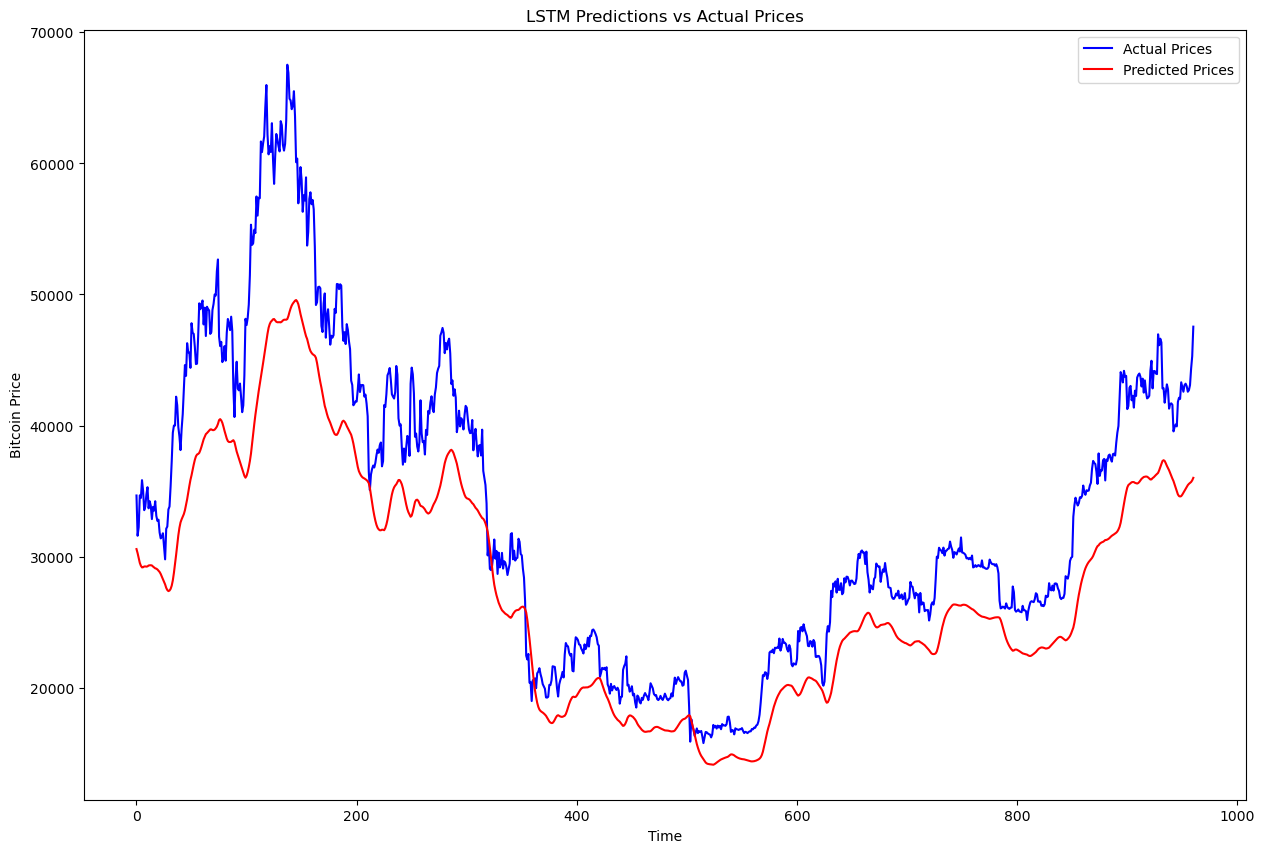

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adagrad

# Load the dataset and preprocess the data

# Define the model architecture

model = Sequential([
    LSTM(128, input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(1)
])

# Compile the model with a different optimizer
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Make predictions and plot results
predictions = model.predict(X_test)
# Plotting code here...
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(scaler.inverse_transform(predictions), label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()

C:\Users\sugip\AppData\Local\Temp\ipykernel_20376\4148658675.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values


Epoch 1/30
62/62 [==============================] - 3s 23ms/step - loss: 0.0018
Epoch 2/30
62/62 [==============================] - 1s 22ms/step - loss: 2.5241e-04
Epoch 3/30
62/62 [==============================] - 1s 22ms/step - loss: 2.3310e-04
Epoch 4/30
62/62 [==============================] - 1s 22ms/step - loss: 1.9846e-04
Epoch 5/30
62/62 [==============================] - 1s 22ms/step - loss: 1.7849e-04
Epoch 6/30
62/62 [==============================] - 1s 22ms/step - loss: 1.7499e-04
Epoch 7/30
62/62 [==============================] - 1s 23ms/step - loss: 1.4761e-04
Epoch 8/30
62/62 [==============================] - 1s 22ms/step - loss: 1.3654e-04
Epoch 9/30
62/62 [==============================] - 1s 23ms/step - loss: 1.4577e-04
Epoch 10/30
62/62 [==============================] - 1s 23ms/step - loss: 1.3704e-04
Epoch 11/30
62/62 [==============================] - 1s 22ms/step - loss: 1.1613e-04
Epoch 12/30
62/62 [==============================] - 1s 23ms/step - loss: 1.13

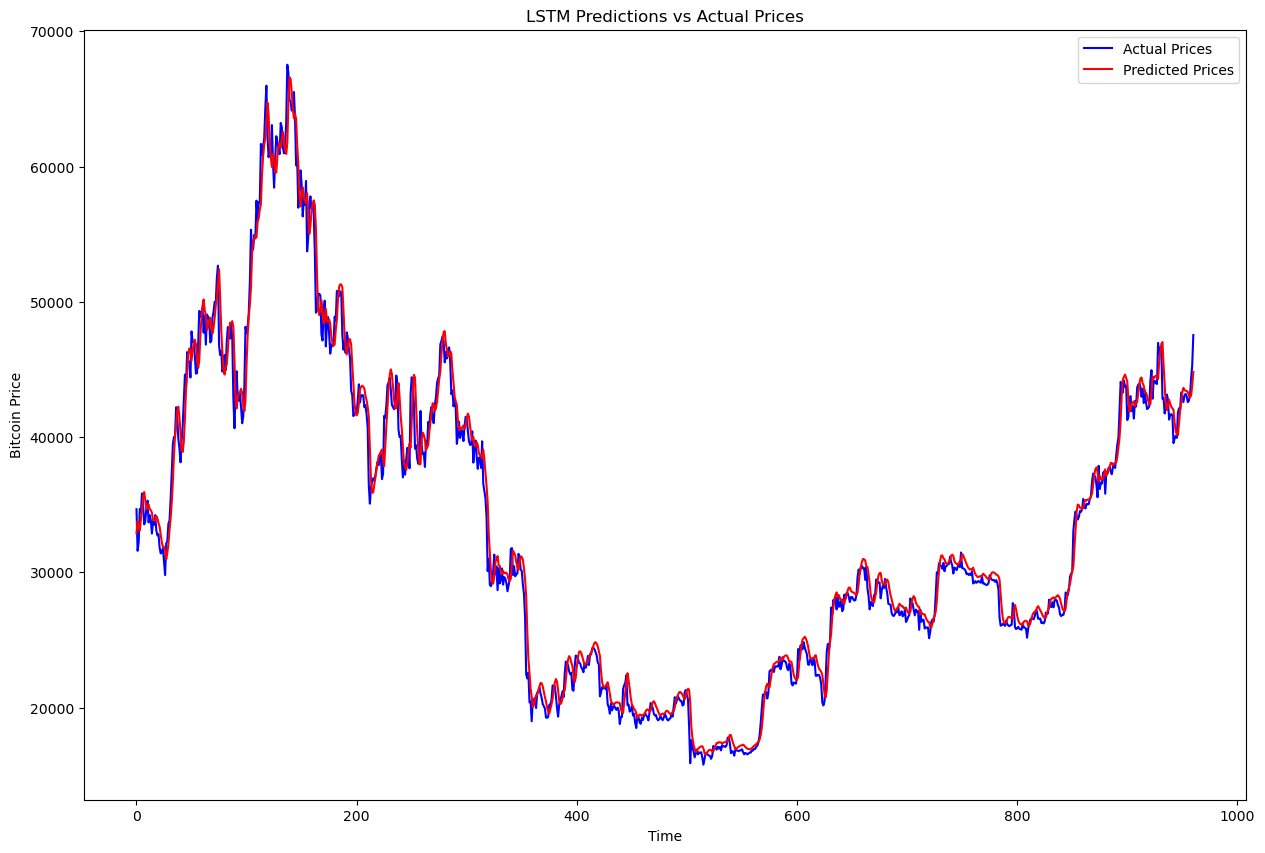

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)

# Ensure the DataFrame is sorted by date
df.sort_index(inplace=True)

# Preprocessing
# Convert 'K' and 'M' suffixed strings to float
def convert_to_numeric(value):
    if pd.isnull(value):
        return np.nan  # Return NaN for missing values
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace(',', '')  # Remove commas from numbers
        if value.endswith('M'):
            return float(value.strip('M')) * 1e6  # Convert to millions
        elif value.endswith('K'):
            return float(value.strip('K')) * 1e3  # Convert to thousands
        else:
            return pd.to_numeric(value, errors='coerce')  # Convert other strings
    return value  # Return as-is if not a string

# Apply the conversion function to all necessary columns
columns_to_convert = ['Price', 'Open', 'High', 'Low', 'Vol.']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Handle missing values
df = df.fillna(method='ffill')  # Forward fill to handle missing values

# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Splitting into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences and labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Adjust this parameter based on the sequence length you want to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

# Make predictions
predictions = model.predict(X_test)

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(scaler.inverse_transform(predictions), label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()


In [63]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

# # Load the dataset
# df = pd.read_csv('DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)
# df.sort_index(inplace=True)
# df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')
# df = df[['Price']].fillna(method='ffill')  # Focusing on 'Price' for prediction

# # Data preparation
# values = df['Price'].values.reshape(-1, 1)
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_values = scaler.fit_transform(values)

# # Split into train and test sets
# train_size = int(len(scaled_values) * 0.8)
# train, test = scaled_values[0:train_size, :], scaled_values[train_size:len(scaled_values), :]

# # Convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
#     X, Y = [], []
#     for i in range(len(dataset) - look_back - 1):
#         a = dataset[i:(i + look_back), 0]
#         X.append(a)
#         Y.append(dataset[i + look_back, 0])
#     return np.array(X), np.array(Y)

# look_back = 1
# X_train, y_train = create_dataset(train, look_back)
# X_test, y_test = create_dataset(test, look_back)

# # Reshape input to be [samples, time steps, features]
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# # Define and compile the LSTM model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(50, input_shape=(1, look_back)),
#     tf.keras.layers.Dense(1)
# ])
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Fit the model
# model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# # Making predictions
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)

# # Invert predictions back to original scale
# train_predict = scaler.inverse_transform(train_predict)
# y_train = scaler.inverse_transform([y_train])
# test_predict = scaler.inverse_transform(test_predict)
# y_test = scaler.inverse_transform([y_test])

# # Evaluate the model
# train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
# print(f'Train Score: {train_score:.2f} RMSE')
# test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
# print(f'Test Score: {test_score:.2f} RMSE')


In [64]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Prepare data for linear regression
# # We'll use the same training and testing sets from before
# X_train_lr = np.reshape(X_train, (X_train.shape[0], X_train.shape[2]))  # Reshaping for linear model
# X_test_lr = np.reshape(X_test, (X_test.shape[0], X_test.shape[2]))

# # Create and train the Linear Regression model
# lr_model = LinearRegression()
# lr_model.fit(X_train_lr, y_train[0])  # y_train is reshaped to 2D array

# # Make predictions
# train_preds_lr = lr_model.predict(X_train_lr)
# test_preds_lr = lr_model.predict(X_test_lr)

# # Evaluate the model
# lr_train_score = np.sqrt(mean_squared_error(y_train[0], train_preds_lr))
# lr_test_score = np.sqrt(mean_squared_error(y_test[0], test_preds_lr))

# print(f'Linear Regression Train Score: {lr_train_score:.2f} RMSE')
# print(f'Linear Regression Test Score: {lr_test_score:.2f} RMSE')
# # 

In [65]:
# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])  # This is correct based on your code


In [66]:
# Inverse scaling for predictions and actual values
predictions_unscaled = scaler.inverse_transform(predictions.reshape(-1, 1))  # Reshape if necessary
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Make sure y_test is reshaped similarly


Mean Squared Error: 0.00037965207430467723
Root Mean Squared Error: 0.019484662540179578
R^2 Score: 0.9874225218983628


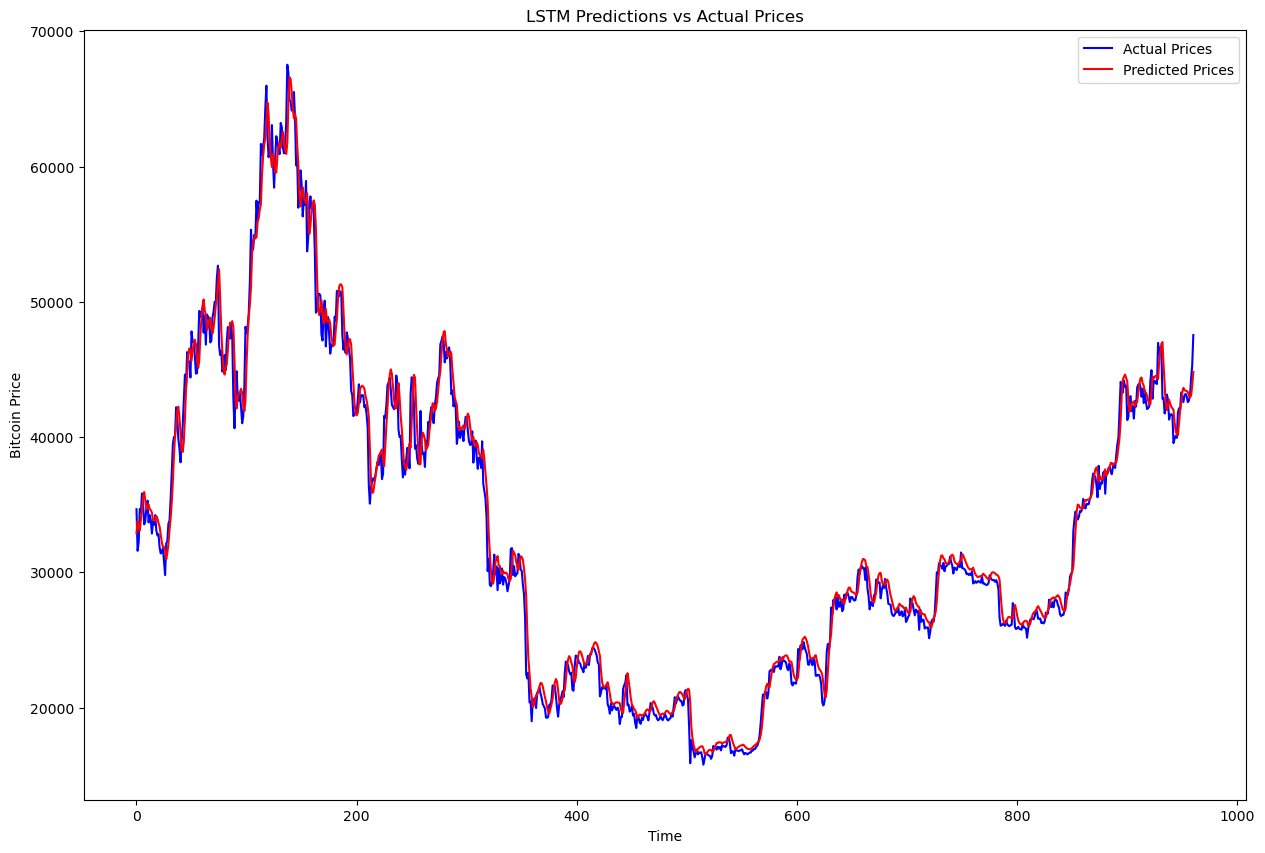

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model directly with scaled data
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

# Plotting after correcting the inverse scaling
plt.figure(figsize=(15, 10))
plt.plot(y_test_unscaled, label='Actual Prices', color='blue')
plt.plot(predictions_unscaled, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()


In [68]:
# Save the model
model.save('bitcoin_lstm_model.h5')


C:\Users\sugip\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('bitcoin_lstm_model.h5')


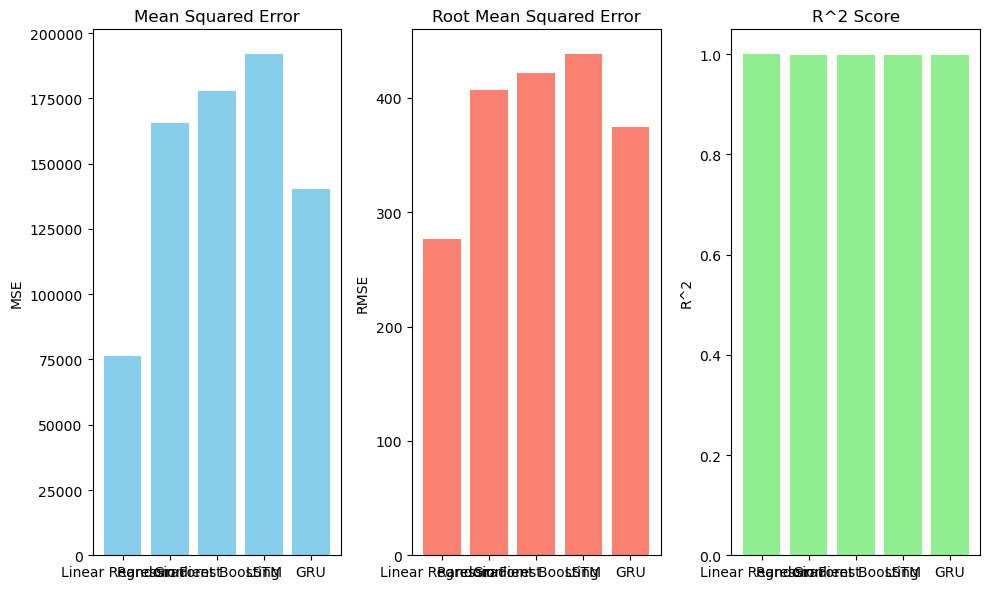

In [1]:
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error')
plt.ylabel('MSE')

# Root Mean Squared Error
plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color='salmon')
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')

# R^2 Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R^2 Score')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()


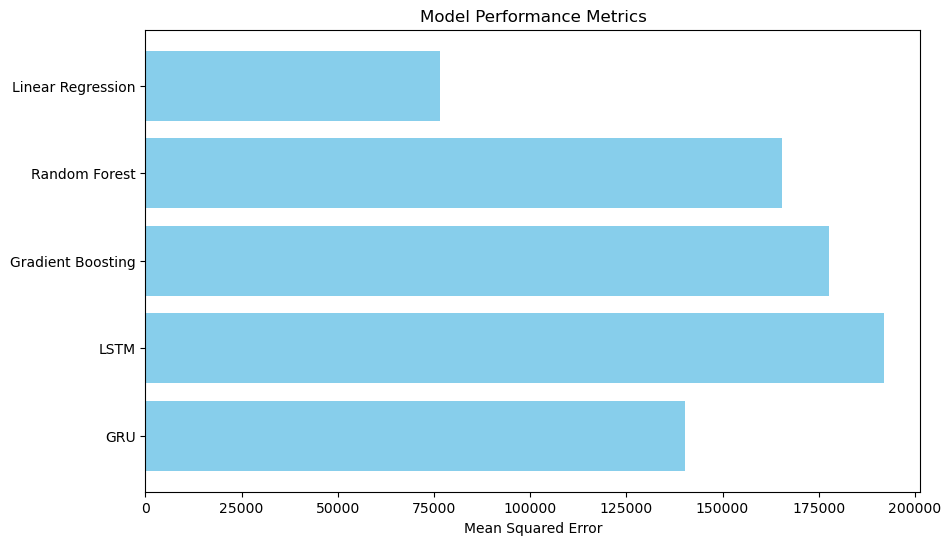

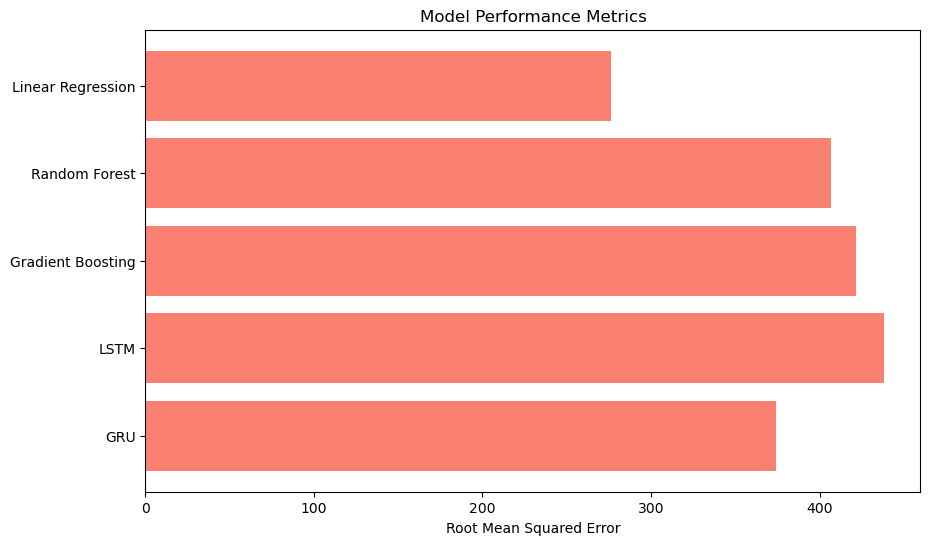

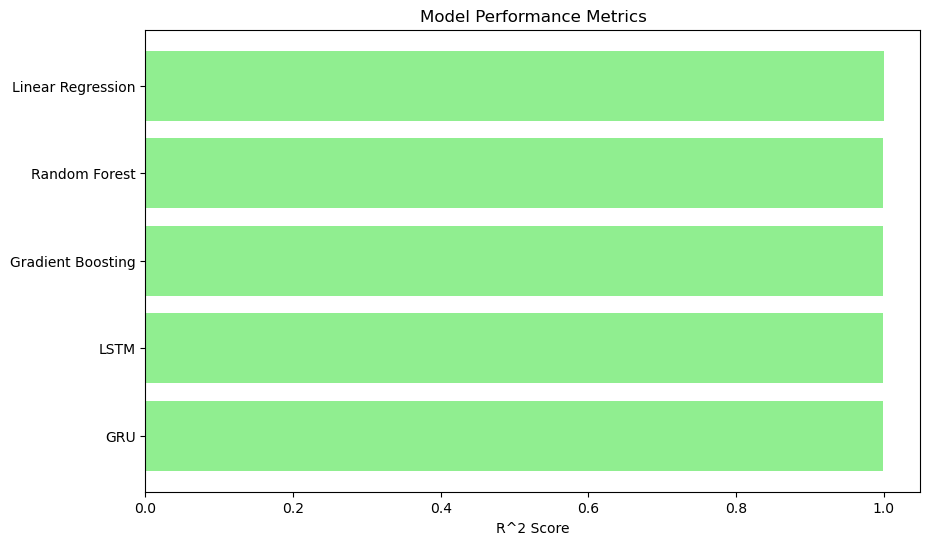

In [2]:
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.barh(models, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Performance Metrics')
plt.gca().invert_yaxis()  # Invert y-axis to have the model names listed from top to bottom
plt.show()

# Root Mean Squared Error
plt.figure(figsize=(10, 6))
plt.barh(models, rmse_values, color='salmon')
plt.xlabel('Root Mean Squared Error')
plt.title('Model Performance Metrics')
plt.gca().invert_yaxis()
plt.show()

# R^2 Score
plt.figure(figsize=(10, 6))
plt.barh(models, r2_values, color='lightgreen')
plt.xlabel('R^2 Score')
plt.title('Model Performance Metrics')
plt.gca().invert_yaxis()
plt.show()


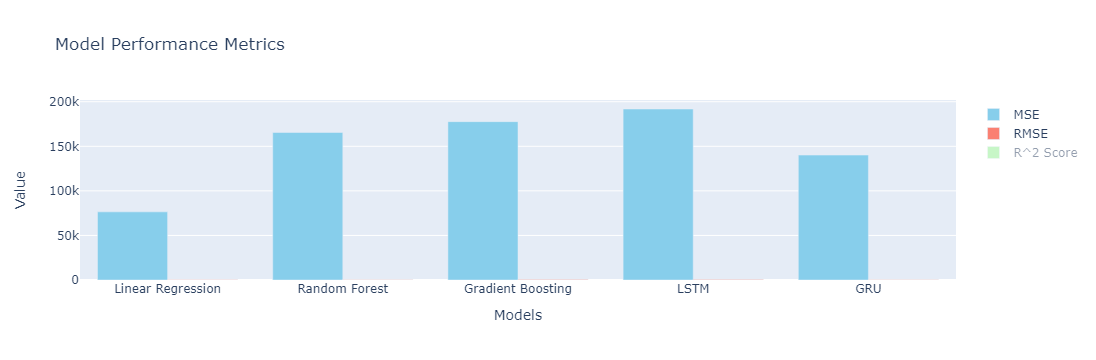

In [5]:
import plotly.graph_objs as go

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Create traces
mse_trace = go.Bar(x=models, y=mse_values, name='MSE', marker=dict(color='skyblue'))
rmse_trace = go.Bar(x=models, y=rmse_values, name='RMSE', marker=dict(color='salmon'))
r2_trace = go.Bar(x=models, y=r2_values, name='R^2 Score', marker=dict(color='lightgreen'))

# Create layout
layout = go.Layout(title='Model Performance Metrics',
                   xaxis=dict(title='Models'),
                   yaxis=dict(title='Value'))

# Create figure
fig = go.Figure(data=[mse_trace, rmse_trace, r2_trace], layout=layout)

# Show the figure
fig.show()


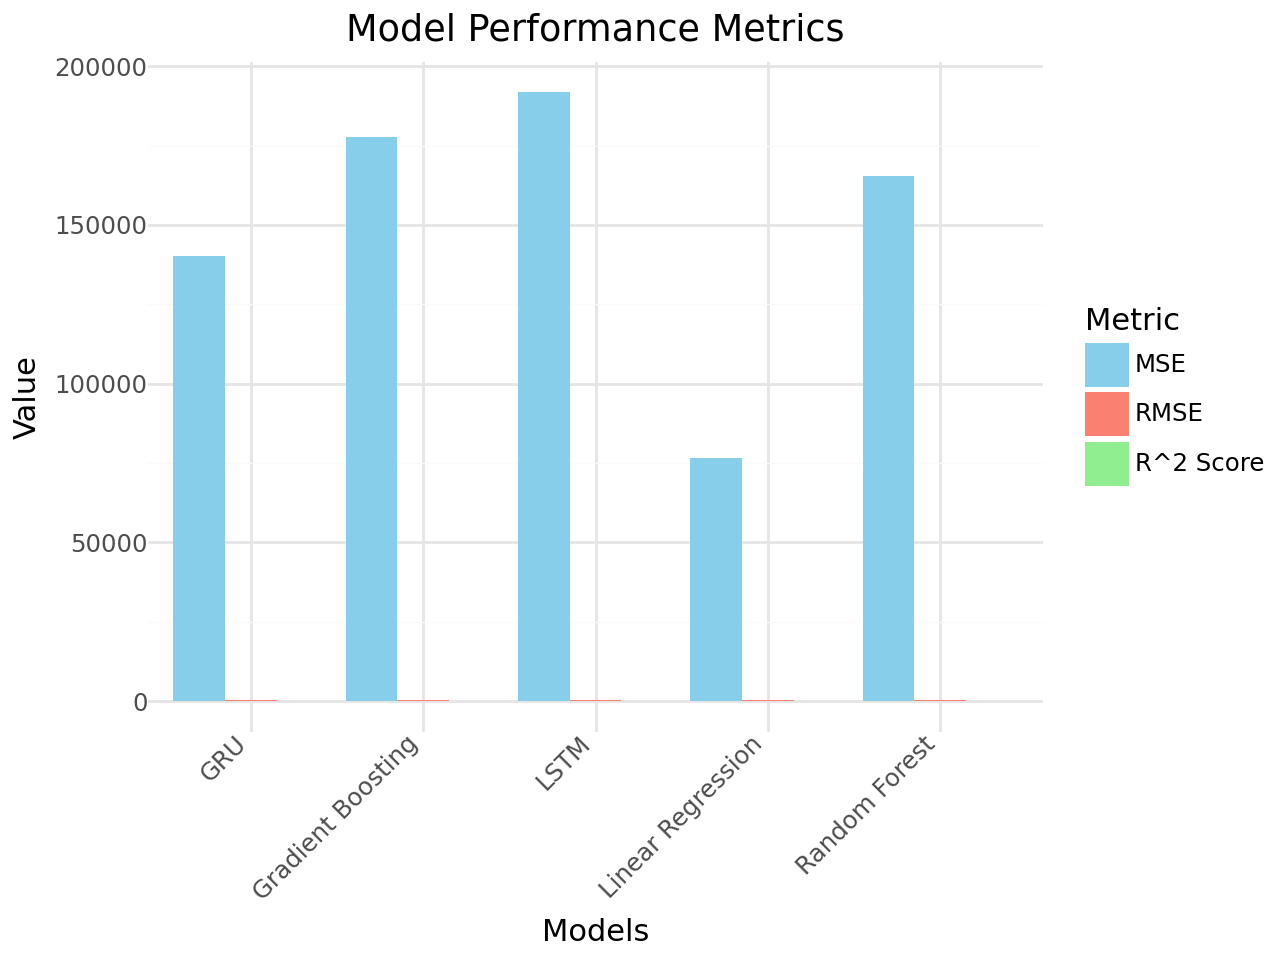

In [9]:
from plotnine import *
import pandas as pd
# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Create a DataFrame for the data
df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'RMSE': rmse_values, 'R^2 Score': r2_values})

# Melt the DataFrame to long format for plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create the plot
(ggplot(df_melted, aes(x='Model', y='Value', fill='Metric')) +
 geom_bar(stat='identity', position='dodge') +
 labs(title='Model Performance Metrics', y='Value', x='Models') +
 theme_minimal() +
 theme(axis_text_x=element_text(angle=45, hjust=1)) +
 scale_fill_manual(values=["skyblue", "salmon", "lightgreen"]))


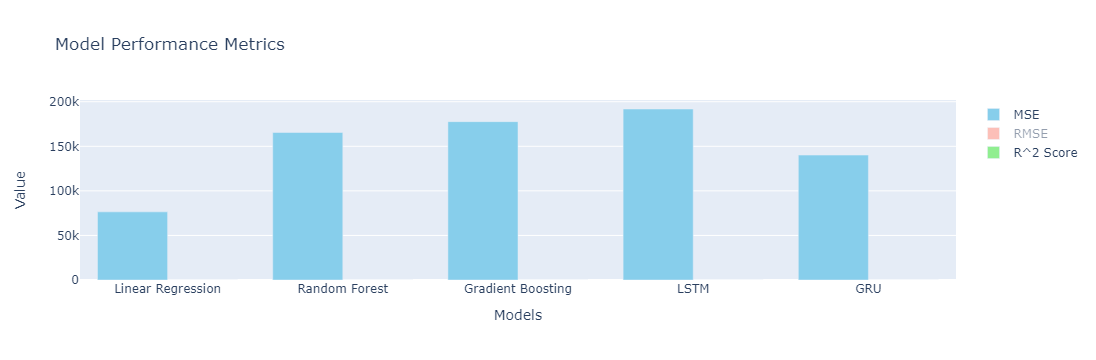

In [18]:
import plotly.graph_objects as go

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Create traces for each performance metric
trace_mse = go.Bar(x=models, y=mse_values, name='MSE', marker=dict(color='skyblue'))
trace_rmse = go.Bar(x=models, y=rmse_values, name='RMSE', marker=dict(color='salmon'))
trace_r2 = go.Bar(x=models, y=r2_values, name='R^2 Score', marker=dict(color='lightgreen'))

# Create layout
layout = go.Layout(title='Model Performance Metrics',
                   xaxis=dict(title='Models'),
                   yaxis=dict(title='Value'))

# Create figure
fig = go.Figure(data=[trace_mse, trace_rmse, trace_r2], layout=layout)

# Show the figure
fig.show()


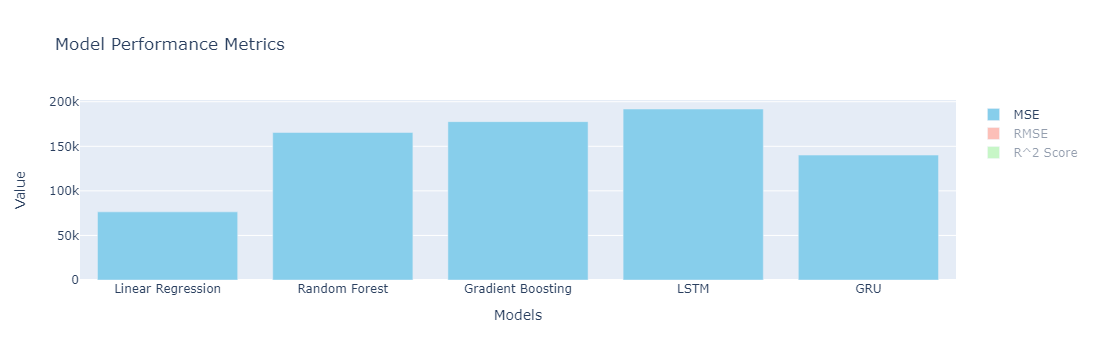

In [19]:
import plotly.graph_objects as go

# Define the models and their performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU']
mse_values = [76444.56, 165521.36, 177677.23, 191858.86, 140171.28]
rmse_values = [276.49, 406.84, 421.52, 438.02, 374.39]
r2_values = [0.9997, 0.9993, 0.9993, 0.9992, 0.9994]

# Create traces for each performance metric
trace_mse = go.Bar(x=models, y=mse_values, name='MSE', marker=dict(color='skyblue'))
trace_rmse = go.Bar(x=models, y=rmse_values, name='RMSE', marker=dict(color='salmon'))
trace_r2 = go.Bar(x=models, y=r2_values, name='R^2 Score', marker=dict(color='lightgreen'))

# Combine all traces into a single list
data = [trace_mse, trace_rmse, trace_r2]

# Create layout
layout = go.Layout(title='Model Performance Metrics',
                   xaxis=dict(title='Models'),
                   yaxis=dict(title='Value'))

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('../DATASET/Bitcoin History.csv', index_col='Date', parse_dates=True)
df.sort_index(inplace=True)

# Preprocessing
def convert_to_numeric(value):
    # Implementation remains the same

def create_sequences(data, seq_length):
    # Implementation remains the same

# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Splitting into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# ARIMA Model
arima_model = ARIMA(train_data, order=(5,1,0))  # Example order, adjust as needed
arima_model_fit = arima_model.fit()

# Make ARIMA predictions
predictions = arima_model_fit.forecast(steps=len(test_data))[0]

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(test_data), label='Actual Prices', color='blue')
plt.plot(scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Predictions vs Actual Prices')
plt.legend()
plt.show()
